### **Handwritten digits Recognition system**

# **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml

Fetching the data from mnist database

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

Dataset

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print("Shape of input : ", X.shape, "Shape of target : ", y.shape)

Shape of input :  (70000, 784) Shape of target :  (70000,)


In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

Visualize the dataset

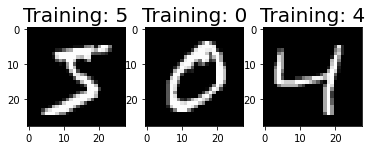

In [ ]:

from matplotlib import pyplot as plt
import numpy as np

plt.figure()
for idx, image in enumerate(X[:3]):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + y[idx], fontsize = 20)

Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split
y = [int(i) for i in y] # targets are strings, so need to convert to # int

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7,random_state=0)
print("training samples shape = ", X_train.shape)
print("testing samples shape = ", X_test.shape)

training samples shape =  (60000, 784)
testing samples shape =  (10000, 784)


In [ ]:

d0 = pd.read_csv('/content/train.csv')

print(d0.head(5)) # print first five rows of d0.

Visualisation

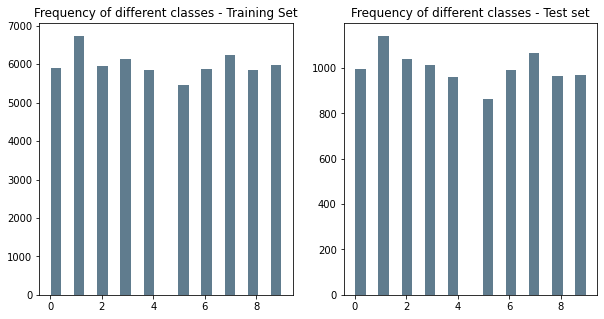

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=20, rwidth=0.9, color='#607c8e');
plt.title('Frequency of different classes - Training Set');


plt.subplot(1,2,2)
plt.hist(y_test, bins=20, rwidth=0.9, color='#607c8e');
plt.title('Frequency of different classes - Test set');

# **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

model
model.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 48 epochs took 324 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  5.4min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

# **Model Evaluation**

Training Accuracy =  93.747
Testing Accuracy =  91.93


Text(0.5, 145.31999999999996, 'Predicted label')

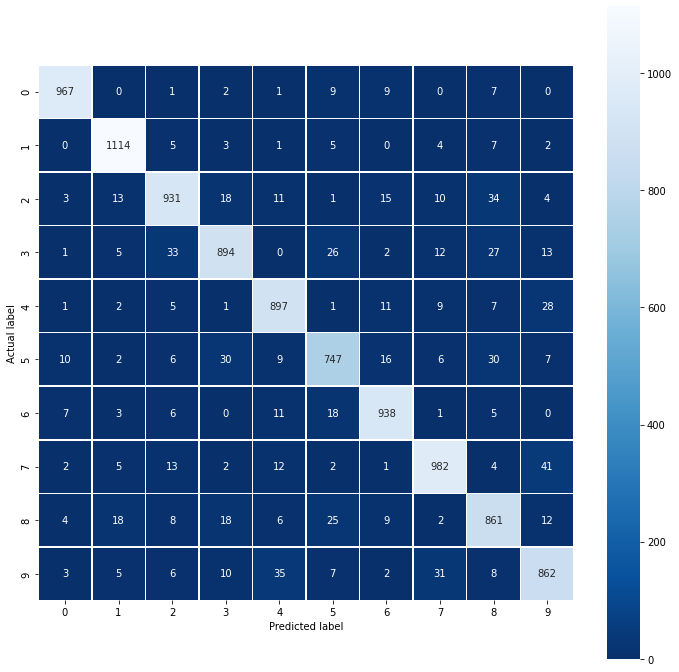

In [ ]:
print("Training Accuracy = ", np.around(model.score(X_train,   y_train)*100,3))
print("Testing Accuracy = ", np.around(model.score(X_test, y_test)*100, 3))

from sklearn import metrics
pred_y_test = model.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, y_pred = pred_y_test, labels = model.classes_)

import seaborn as sns
plt.figure(figsize=(12,12))

sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, pred_y_test):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
    
    if len(misclassified_images) == 10:
        break
print("Ten Indexes are : ",misclassified_images)

Ten Indexes are :  [4, 5, 18, 61, 78, 82, 129, 134, 141, 161]


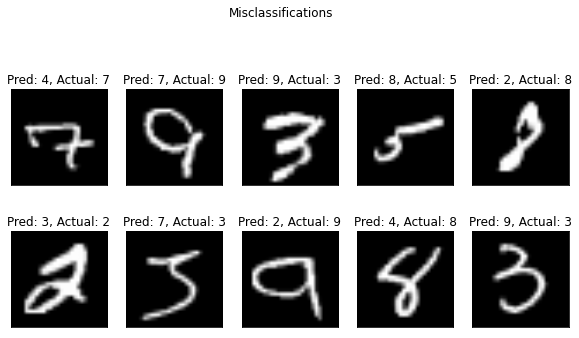

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');
for plot_index, bad_index in enumerate(misclassified_images):
  p = plt.subplot(4,5, plot_index+1) 
    
  p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray,
            interpolation='bilinear')
  p.set_xticks(()); p.set_yticks(()) 
    
  p.set_title(f'Pred: {pred_y_test[bad_index]}, Actual: {y_test[bad_index]}');

In [ ]:
index = 0
successfull_images = []
for label, predict in zip(y_test, pred_y_test):
    if label == predict: 
        successfull_images.append(index)
    index +=1
    
    if len(successfull_images) == 10:
        break
print("Ten Indexes are : ",successfull_images)

Ten Indexes are :  [0, 1, 2, 3, 6, 7, 8, 9, 10, 11]


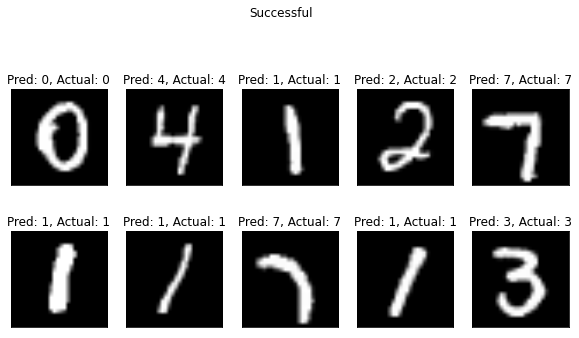

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Successful');
for plot_index, good_index in enumerate(successfull_images):
  p = plt.subplot(4,5, plot_index+1) 
    
  p.imshow(X_test[good_index].reshape(28,28), cmap=plt.cm.gray,
            interpolation='bilinear')
  p.set_xticks(()); p.set_yticks(()) 
    
  p.set_title(f'Pred: {pred_y_test[good_index]}, Actual: {y_test[good_index]}');

### **SVM**

Linear model:

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
# linear model

# model_linear = SVC(kernel='linear')
# model_linear.fit(X_train, y_train)

# predict
# y_pred = model_linear.predict(X_test)

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
# print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
#precision, recall and f1-score
# scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# print(scores)

Let's look at a non-linear model with randomly chosen hyperparameters.

Non- linear model:

Poly kernel

In [ ]:
# non-linear model
# using poly kernel, C=1(default), default value of gamma i.e. scale

# model

non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm 
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
# y_true: Ground truth (correct) target values. 
# y_pred: Estimated targets as returned by a classifier.

accuracy: 0.975 

[[ 982    0    4    1    0    4    4    1    0    0]
 [   0 1133    3    0    1    0    1    2    1    0]
 [   5    2 1016    1    3    0    3    6    3    1]
 [   1    1   10  972    0    7    0    8   11    3]
 [   1    2    3    0  943    1    0    3    2    7]
 [   0    1    2    6    0  841    8    1    2    2]
 [   4    0    0    0    3    5  975    0    2    0]
 [   1    7    8    0    7    0    0 1030    0   11]
 [   0    6    6    6    2    4    3    0  929    7]
 [   3    1    1    3   13    7    1    9    2  929]]


In [ ]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       996
           1       0.98      0.99      0.99      1141
           2       0.96      0.98      0.97      1040
           3       0.98      0.96      0.97      1013
           4       0.97      0.98      0.98       962
           5       0.97      0.97      0.97       863
           6       0.98      0.99      0.98       989
           7       0.97      0.97      0.97      1064
           8       0.98      0.96      0.97       963
           9       0.97      0.96      0.96       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



As we clearly see that the non-linear rbf model gives approx. 97.5% accuracy. And most of the precision is above 95%.

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
#Create KNeighborsClassifier Object

In [ ]:
score = []
for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train)
  pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))
  accuracy = accuracy_score(y_test, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  #print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
  print("---------------\n")

Begin KNN with k= 1
Accuracy:  0.9716
---------------

Begin KNN with k= 2
Accuracy:  0.9679
---------------

Begin KNN with k= 3
Accuracy:  0.9741
---------------

Begin KNN with k= 4
Accuracy:  0.9718
---------------

Begin KNN with k= 5
Accuracy:  0.9727
---------------

Begin KNN with k= 6
Accuracy:  0.9719
---------------

Begin KNN with k= 7
Accuracy:  0.9725
---------------

Begin KNN with k= 8
Accuracy:  0.9718
---------------



Values of K, and performance

K = 1, accuracy = 97.16

k = 2, accuracy = 96.79

k = 3, accuracy = 97.41

k = 4, accuracy = 97.18

k = 5, accuracy = 97.27

k = 6, accuracy = 97.19

k = 7, accuracy = 97.25

k = 8, accuracy = 97.18

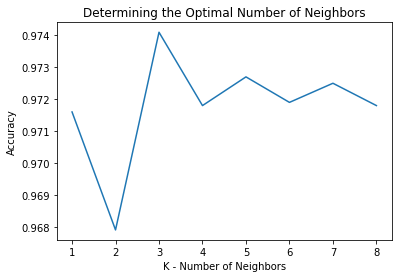

In [ ]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y)

Testing the KNN Model

In [ ]:

y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 995    0    0    0    0    0    1    0    0    0]
 [   0 1139    2    0    0    0    0    0    0    0]
 [   3    2 1025    0    1    0    0    6    2    1]
 [   0    1    6  995    0    4    0    5    2    0]
 [   0    2    0    0  953    0    0    2    0    5]
 [   1    0    2    2    0  849    8    0    0    1]
 [   2    1    0    0    2    2  982    0    0    0]
 [   0    4    2    0    1    0    0 1053    0    4]
 [   0    9    2    7    2    3    0    0  935    5]
 [   1    1    0    3    3    0    1    6    1  953]]
0.9879


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1002
           1       1.00      0.98      0.99      1159
           2       0.99      0.99      0.99      1039
           3       0.98      0.99      0.99      1007
           4       0.99      0.99      0.99       962
           5       0.98      0.99      0.99       858
           6       0.99      0.99      0.99       992
           7       0.99      0.98      0.99      1072
           8       0.97      0.99      0.98       940
           9       0.98      0.98      0.98       969

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



KNN Model with 3 neighbors performed really well with 98.79 % accuracy.

Logistic Regression Testing Accuracy: 91.93%

SVM(Poly Kernel) Testing Accuracy: 97.5%

KNN Testing Accuracy: 98.79%

Hence we decided to go further with KNN model with highest accuracy of 98.79% .

### Deploying our model

In [ ]:
import pickle 
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X.reshape(X.shape[0], 28*28), y)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import joblib
joblib.dump(classifier, 'knn_model.gzip', compress=('gzip',3))

['knn_model.gzip']

In [ ]:
import joblib
joblib.dump(non_linear_model_poly,'svc_mnist_60k.gz',compress=('gzip',3))


['svc_mnist_60k.gz']

# **PCA**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

In [ ]:

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [ ]:

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
xx = np.random.random((5,5))
yy = np.zeros((5,5) ) 
np.isnan(xx).any()
np.isnan(yy).any()

np.isinf(xx).any()
np.isinf(yy).any()

False

In [ ]:
xx = np.nan_to_num(xx)
yy = np.nan_to_num(yy)

In [ ]:


from scipy.linalg import eigh 

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)

vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)


Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
final_df = np.matmul(vectors, standardized_data.T)
print("vectros:", vectors.shape, "n", "std_data:", standardized_data.T.shape, "n", "final_data:", final_df.shape)

vectros: (2, 784) n std_data: (784, 15000) n final_data: (2, 15000)


In [ ]:
final_dfT = np.vstack((final_df, labels)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

,pca_1,pca_2,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0
...,...,...,...
14995,3.139416,-4.758956,1.0
14996,1.946714,-1.314215,4.0
14997,-2.147937,-1.507269,8.0
14998,3.204122,-6.537313,9.0


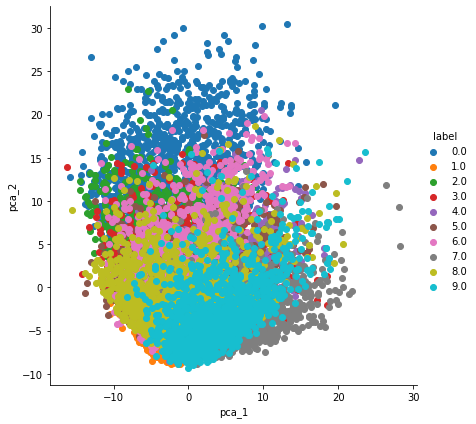

In [ ]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataFrame, hue="label", size=6).map(plt.scatter, 'pca_1', 'pca_2').add_legend()
plt.show()

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

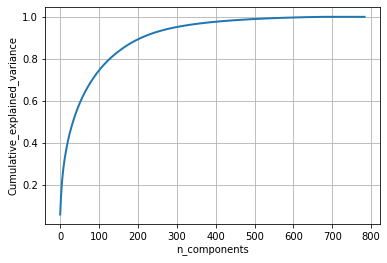

In [ ]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=300)
pca.fit(data)

PCA(n_components=300)

In [ ]:
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

In [ ]:
print(pca.explained_variance_ratio_)

[0.09648548 0.07231498 0.06219077 0.05407148 0.04832618 0.04317862
 0.03276246 0.02865079 0.02803773 0.02363055 0.0210048  0.0202608
 0.01714108 0.01664665 0.01583748 0.01477356 0.01315676 0.0128388
 0.01182777 0.01159738 0.01086109 0.01022287 0.00978944 0.0091712
 0.00887753 0.00841499 0.00820143 0.00791867 0.00736434 0.00687146
 0.00660424 0.00648298 0.00604782 0.00589239 0.00559276 0.00535605
 0.00507735 0.00490294 0.0048463  0.00463976 0.00453312 0.00439989
 0.00419801 0.00397384 0.00384614 0.00378137 0.00363981 0.00348958
 0.00334912 0.00320569 0.00314324 0.00306614 0.00293107 0.00291322
 0.00280866 0.00270657 0.0026464  0.00257018 0.00252809 0.00245609
 0.00239879 0.00236127 0.0022609  0.00220862 0.00210699 0.00205932
 0.00199956 0.00198487 0.0019325  0.0018933  0.0018769  0.00181795
 0.00174824 0.00172669 0.00165128 0.00162618 0.00158567 0.00154023
 0.00146769 0.00143307 0.00141435 0.00140855 0.00137953 0.00135972
 0.00133165 0.00129426 0.00127915 0.00126493 0.00121347 0.0011981

In [ ]:
print(pca.singular_values_)

[70487.79532772 61023.4958244  56590.81257978 52767.56609441
 49885.48238104 47153.86751333 41074.39926834 38410.61193437
 37997.44379813 34883.48208956 32888.35893596 32300.64967749
 29709.96183107 29278.33422816 28557.87731714 27581.98142135
 26028.99340814 25712.55112072 24679.3900364  24437.8435499
 23649.37215616 22944.0115006  22452.35342169 21731.81490198
 21381.05542043 20816.59979808 20550.7475174  20193.37843095
 19473.7560279  18810.81072958 18441.42201097 18271.33000148
 17647.46190174 17419.21880349 16970.54839117 16607.53435234
 16169.68943496 15889.534279   15797.49428865 15457.19344614
 15278.52566155 15052.3347137  14702.95156132 14305.00758238
 14073.27822547 13954.27873833 13690.59580916 13405.09098586
 13132.53273027 12848.24251286 12722.47731533 12565.4689953
 12285.60066567 12248.11499513 12026.32010778 11805.71867001
 11673.76522886 11504.40863815 11409.83593962 11246.18889517
 11114.21458167 11026.96153663 10790.04461729 10664.57988066
 10416.32407266 10297.8134